In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# Loading the dataset
data = pd.read_csv('C:/Users/shaje/OneDrive/Documents/NCL Internship/7_2023_113.csv')

In [26]:
data.head()

,bulk_id,car_reg_no,vehicle_speed,heading,distance,altitude,o_s1_b1_voltage,o_s2_b2_voltage,o_s1_current,calculated_engine_load,...,egr_error,absolute_barometric_pressure,engine_coolant_temperature,intake_air_temperature,catalyst_temperature_b1_s1,catalyst_temperature_b1_s2,ambient_air_temperature,time_stamp,latitude,longitude
0,7706475,113,21.0,0.0,NaN,0.0,NaN,0.80,0.0,80.3922,...,NaN,99.0,91.0,60.0,0.0,0.0,33.0,2023-07-15 23:59:58,0.0,0.0
1,7706474,113,11.0,0.0,NaN,0.0,NaN,0.80,0.0,93.7255,...,NaN,99.0,91.0,58.0,0.0,0.0,33.0,2023-07-15 23:59:56,0.0,0.0
2,7706473,113,5.0,0.0,NaN,0.0,NaN,0.78,0.0,60.0000,...,NaN,99.0,91.0,58.0,0.0,0.0,33.0,2023-07-15 23:59:54,0.0,0.0
3,7706472,113,5.0,0.0,NaN,0.0,NaN,0.78,0.0,60.0000,...,NaN,99.0,91.0,57.0,0.0,0.0,33.0,2023-07-15 23:59:52,0.0,0.0
4,7706471,113,5.0,0.0,NaN,0.0,NaN,0.78,0.0,46.6667,...,NaN,99.0,92.0,57.0,0.0,0.0,33.0,2023-07-15 23:59:50,0.0,0.0


In [27]:
data.shape

(1169744, 41)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169744 entries, 0 to 1169743
Data columns (total 41 columns):
 #   Column                                Non-Null Count    Dtype  
---  ------                                --------------    -----  
 0   bulk_id                               1169744 non-null  int64  
 1   car_reg_no                            1169744 non-null  int64  
 2   vehicle_speed                         1169744 non-null  float64
 3   heading                               1169744 non-null  float64
 4   distance                              0 non-null        float64
 5   altitude                              1169744 non-null  float64
 6   o_s1_b1_voltage                       0 non-null        float64
 7   o_s2_b2_voltage                       1151513 non-null  float64
 8   o_s1_current                          1151444 non-null  float64
 9   calculated_engine_load                1151330 non-null  float64
 10  engine_rpm                            1150418 non-null

In [29]:
data.isnull().sum()

bulk_id                                       0
car_reg_no                                    0
vehicle_speed                                 0
heading                                       0
distance                                1169744
altitude                                      0
o_s1_b1_voltage                         1169744
o_s2_b2_voltage                           18231
o_s1_current                              18300
calculated_engine_load                    18414
engine_rpm                                19326
spark_advance                             19906
absolute_load_value                       20351
throttle_position                         20599
relative_throttle_position                20775
absolute_throttle_position                20889
ap_pos_d                                  21731
ap_pos_e                                  21980
commanded_exhaust_gas_recirculation     1169744
commanded_evaporative_purge               21980
commanded_throttle_actuator             

In [30]:
# Drop irrelevant columns and handle missing values
data.drop(columns=['bulk_id', 'car_reg_no', 'latitude', 'longitude'], inplace=True)

In [31]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       vehicle_speed       heading  distance      altitude  o_s1_b1_voltage  \
count   1.169744e+06  1.169744e+06       0.0  1.169744e+06              0.0   
mean    2.115940e+01  1.438124e+01       NaN -3.297238e+00              NaN   
std     1.754822e+01  5.021642e+01       NaN  1.187946e+01              NaN   
min     0.000000e+00  0.000000e+00       NaN -4.344500e+01              NaN   
25%     6.000000e+00  0.000000e+00       NaN  0.000000e+00              NaN   
50%     1.800000e+01  0.000000e+00       NaN  0.000000e+00              NaN   
75%     3.400000e+01  0.000000e+00       NaN  0.000000e+00              NaN   
max     9.100000e+01  1.899736e+02       NaN  3.102020e+01              NaN   

       o_s2_b2_voltage  o_s1_current  calculated_engine_load    engine_rpm  \
count     1.151513e+06     1151444.0            1.151330e+06  1.150418e+06   
mean      5.107657e-01           0.0            6.151922e+01  1.231258e+03   
std       3.330062e-01           

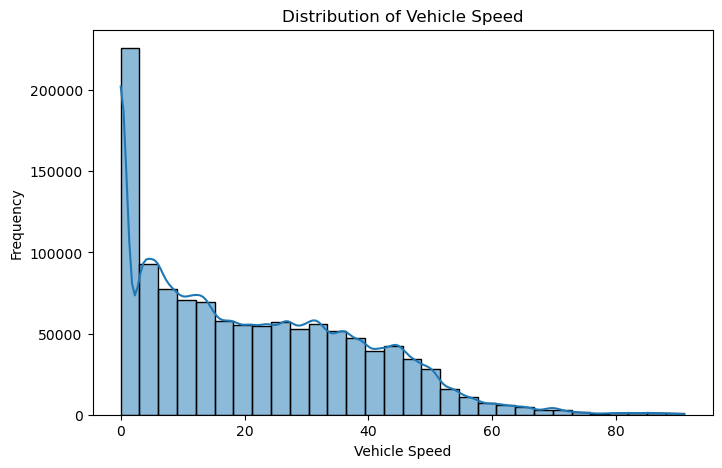

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of the target variable (vehicle_speed)
plt.figure(figsize=(8, 5))
sns.histplot(data['vehicle_speed'], kde=True, bins=30)
plt.title('Distribution of Vehicle Speed')
plt.xlabel('Vehicle Speed')
plt.ylabel('Frequency')
plt.show()

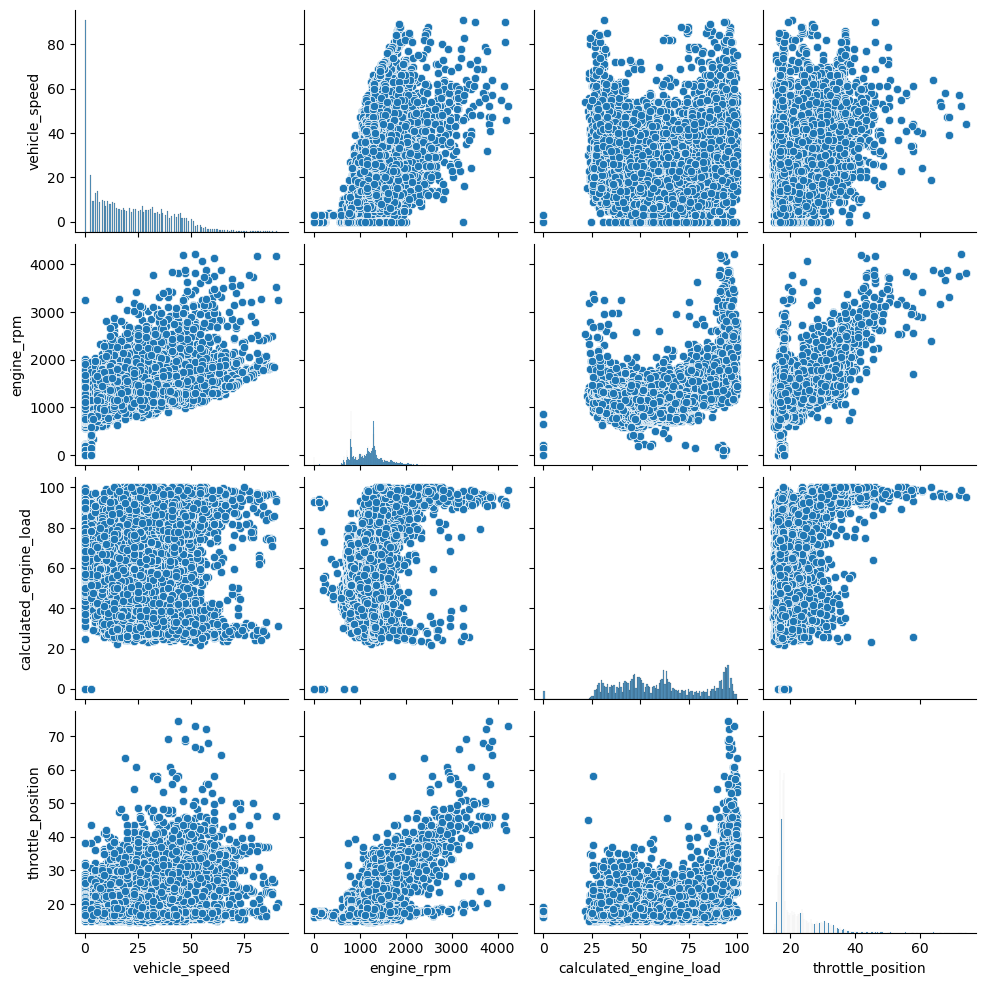

In [33]:
# Pairplot of selected features and target
selected_features = ['vehicle_speed', 'engine_rpm', 'calculated_engine_load', 'throttle_position']
sns.pairplot(data[selected_features])
plt.show()

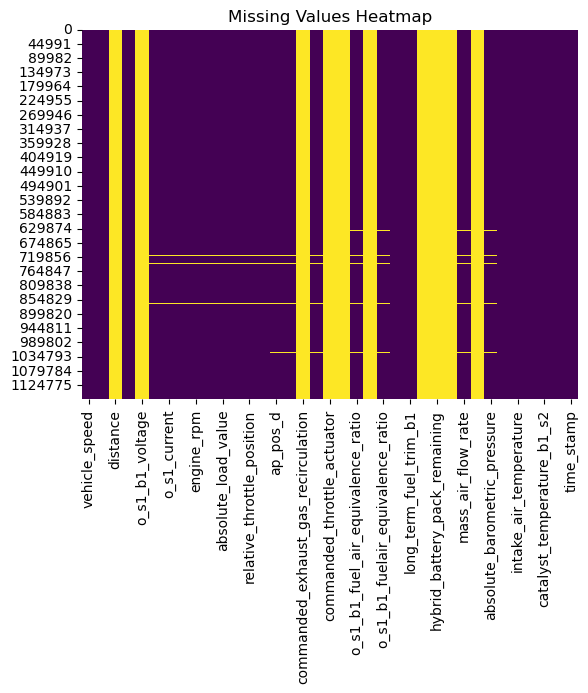

In [34]:
# Missing values heatmap
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [47]:
# Drop irrelevant or fully null columns
columns_to_drop = [
    'distance', 'o_s1_b1_voltage', 'commanded_exhaust_gas_recirculation', 
    'commanded_throttle_actuator', 'fuel_rail_pressure', 'fuel_tank_level_input',
    'fuel_air_commanded_equivalence_ratio', 'hybrid_battery_pack_remaining',
    'intake_manifold_absolute_pressure', 'egr_error', 'catalyst_temperature_b1_s1',
    'catalyst_temperature_b1_s2', 
]
data_cleaned = data.drop(columns=columns_to_drop, axis=1)

In [48]:
# Ensure the time_stamp column is in datetime format
data['time_stamp'] = pd.to_datetime(data['time_stamp'])

In [36]:
# Impute missing values with column means
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_cleaned[numerical_columns] = imputer.fit_transform(data_cleaned[numerical_columns])

In [37]:
# Confirm data cleaning
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169744 entries, 0 to 1169743
Data columns (total 24 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   vehicle_speed                       1169744 non-null  float64
 1   heading                             1169744 non-null  float64
 2   altitude                            1169744 non-null  float64
 3   o_s2_b2_voltage                     1169744 non-null  float64
 4   o_s1_current                        1169744 non-null  float64
 5   calculated_engine_load              1169744 non-null  float64
 6   engine_rpm                          1169744 non-null  float64
 7   spark_advance                       1169744 non-null  float64
 8   absolute_load_value                 1169744 non-null  float64
 9   throttle_position                   1169744 non-null  float64
 10  relative_throttle_position          1169744 non-null  float64
 11  absolute_th

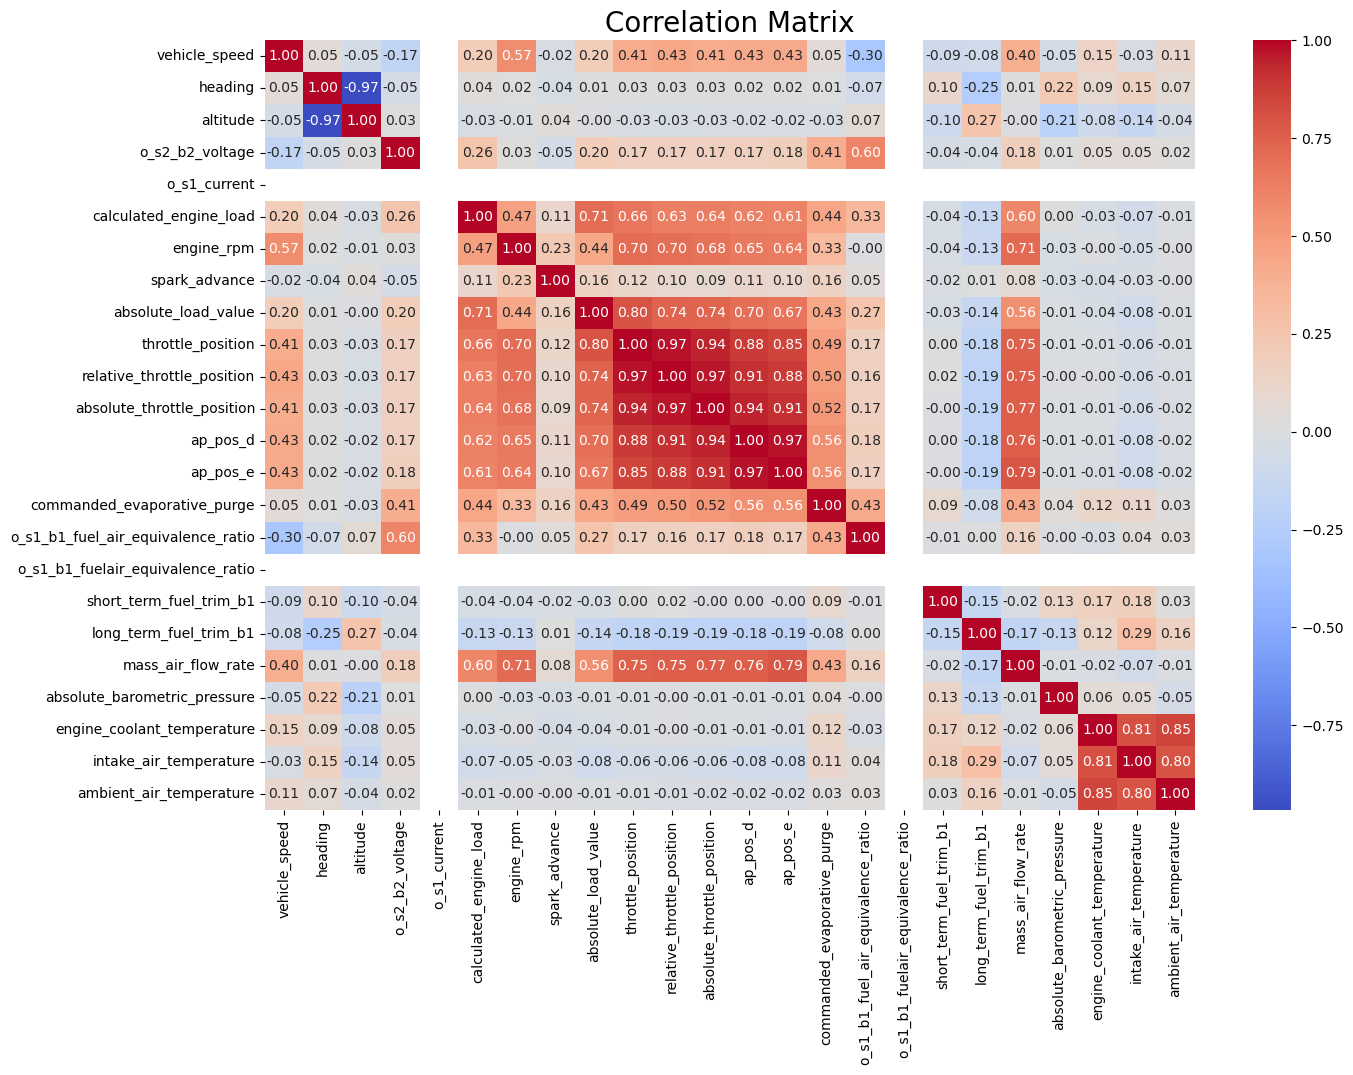

In [38]:
# EDA: Correlation Matrix
correlation_matrix = data_cleaned.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=20)
plt.show()

In [39]:
# Define target and features
target_variable = 'vehicle_speed'
X = data_cleaned.drop(columns=[target_variable])
y = data_cleaned[target_variable]

In [40]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
# Standard Scaling of features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(random_state=0, n_estimators=100)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=0)

In [43]:
# Predictions and evaluation
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [45]:
# Print metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Root Mean Squared Error (RMSE): 0.0795642380211779
R-squared (R²): 0.9999794494709726


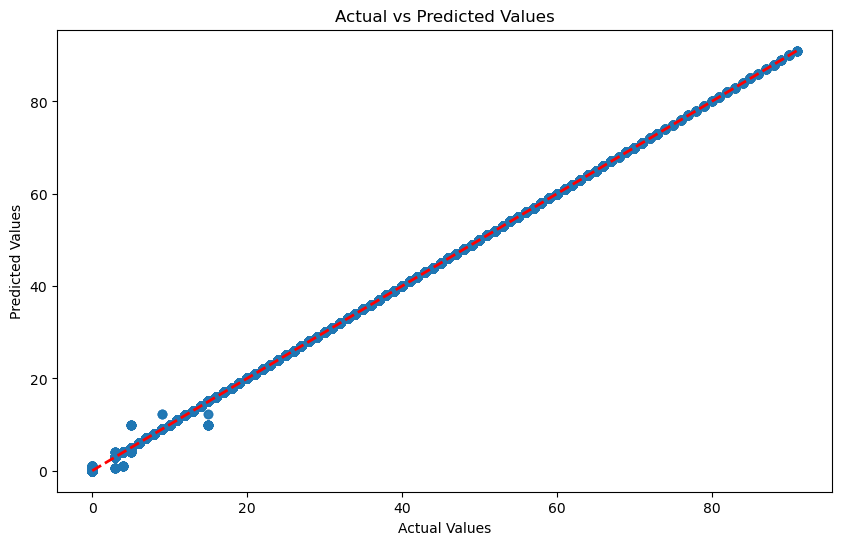

In [46]:
# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [49]:
# Filter out rows where vehicle speed is greater than zero (indicating movement)
moving_data = data[data['vehicle_speed'] > 0]

In [50]:
# Calculate required statistics
average_speed = moving_data['vehicle_speed'].mean()  # Average speed
maximum_speed = moving_data['vehicle_speed'].max()  # Maximum speed
total_driving_time_minutes = len(moving_data) * 2 / 60  # Assuming data points every 2 seconds
distance_traveled = moving_data['distance'].sum() / 1000  # Convert meters to kilometers
fuel_consumed = 0.12 * distance_traveled  # Assuming fuel consumption of 12 L/100 km
mileage = distance_traveled / fuel_consumed if fuel_consumed > 0 else 0  # Calculate mileage
average_coolant_temp = moving_data['engine_coolant_temperature'].mean()  # Average engine coolant temperature
engine_overheat_percentage = (
    len(moving_data[moving_data['engine_coolant_temperature'] > 105]) / len(moving_data) * 100
) if len(moving_data) > 0 else 0  # Overheating instances

In [51]:
# Prepare the summary in the desired format
summary = f"""
***** Dataset Summary *****
Average Speed: {average_speed:.2f} kmph
Maximum Speed: {maximum_speed:.2f}
Total Driving Time: {total_driving_time_minutes:.2f} minutes
Distance Travelled: {distance_traveled:.2f} kms
Fuel Consumed: {fuel_consumed:.2f} liters
Mileage for the duration: {mileage:.2f} km/L
Engine Coolant Temperature: {average_coolant_temp:.2f} °C
Engine Overheat Percentage: {engine_overheat_percentage:.2f} %
"""

print(summary)


***** Dataset Summary *****
Average Speed: 24.96 kmph
Maximum Speed: 91.00
Total Driving Time: 33047.97 minutes
Distance Travelled: 0.00 kms
Fuel Consumed: 0.00 liters
Mileage for the duration: 0.00 km/L
Engine Coolant Temperature: 88.66 °C
Engine Overheat Percentage: 0.00 %



In [52]:
# Calculate the percentage of time engine coolant temperature is >= 95°C
coolant_temp_threshold = 95
coolant_temp_exceed_percentage = (
    len(moving_data[moving_data['engine_coolant_temperature'] >= coolant_temp_threshold]) 
    / len(moving_data) * 100
) if len(moving_data) > 0 else 0

# Display the result
print(f"Percentage of time engine coolant temperature >= {coolant_temp_threshold}°C: {coolant_temp_exceed_percentage:.2f} %")

Percentage of time engine coolant temperature >= 95°C: 0.19 %
